# Project - Manufacturing







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Manufacuring.xlsx', usecols=[1,2])  

In [3]:
df

,Lot_Size,Man_Hour
0,30,73
1,20,50
2,60,128
3,80,170
4,40,87
5,50,108
6,60,135
7,30,69
8,70,148
9,60,132


In [4]:
df.head()

,Lot_Size,Man_Hour
0,30,73
1,20,50
2,60,128
3,80,170
4,40,87


In [5]:
df.tail()

,Lot_Size,Man_Hour
5,50,108
6,60,135
7,30,69
8,70,148
9,60,132


In [6]:
df.info()   #Data type of the Data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Lot_Size  10 non-null     int64
 1   Man_Hour  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [7]:
pd.set_option('precision', 2)         # 2 values after precision. 

df.describe()

,Lot_Size,Man_Hour
count,10.00,10.00
mean,50.00,110.00
std,19.44,38.96
min,20.00,50.00
25%,32.50,76.50
50%,55.00,118.00
75%,60.00,134.25
max,80.00,170.00


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Size,10.0,50.0,19.44,20.0,32.5,55.0,60.00,80.0
Man_Hour,10.0,110.0,38.96,50.0,76.5,118.0,134.25,170.0


In [9]:
import statistics

statistics.variance(df['Lot_Size'])

377.77777777777777

In [10]:
import statistics

statistics.variance(df['Man_Hour']) 

1517.7777777777778

In [11]:
df.isnull().sum()   # Analysis of NULL Values in Predictors

Lot_Size    0
Man_Hour    0
dtype: int64

In [12]:
(df == 0).sum(axis=0)    # Analysis of Zero Values in Predictors

Lot_Size    0
Man_Hour    0
dtype: int64

In [13]:
df.Man_Hour.value_counts()     

128    1
132    1
50     1
148    1
69     1
87     1
73     1
170    1
108    1
135    1
Name: Man_Hour, dtype: int64

- All values are unique here. 

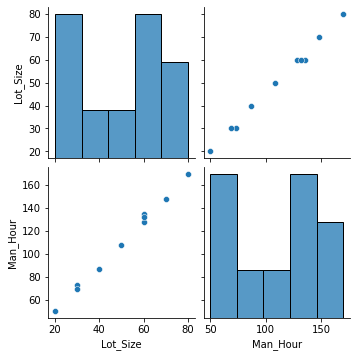

In [14]:
import seaborn as sns
sns.pairplot(df)

In [15]:
import warnings
warnings.filterwarnings("ignore")

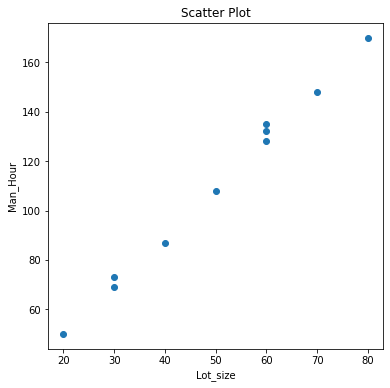

2

In [16]:

X = df['Lot_Size']
y= df['Man_Hour'] 

plt.figure(figsize=(6,6))

plt.scatter(X, y, label = "label_name" )

# Set x and y axes labels
plt.xlabel('Lot_size')
plt.ylabel('Man_Hour')

plt.title('Scatter Plot')

plt.show()
2


# scaled Data

In [17]:
# Scaling the Data. 

from sklearn.preprocessing import scale                # we can also use StandardScalar. 
X = scale(df.Lot_Size, with_mean=True, with_std=False).reshape(-1,1)
y = df.Man_Hour

In [18]:
X

array([[-20.],
       [-30.],
       [ 10.],
       [ 30.],
       [-10.],
       [  0.],
       [ 10.],
       [-20.],
       [ 20.],
       [ 10.]])

In [19]:
y

0     73
1     50
2    128
3    170
4     87
5    108
6    135
7     69
8    148
9    132
Name: Man_Hour, dtype: int64

In [20]:
X.mean()   #very near to zero. 

0.0

In [21]:
X.std()     

18.439088914585774

In [22]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression

regr = skl_lm.LinearRegression()



regr.fit(X,y)
LinearRegression()

regr.intercept_ 

110.0

In [23]:
regr.coef_

array([2.])

In [24]:
 ( regr.score(X,y) ) * 100           # Accuracy Score of the Model.  

99.56076134699853

# UnScaled Data

In [25]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression



regr = skl_lm.LinearRegression()
X = df.Lot_Size.values.reshape(-1,1)
y = df.Man_Hour

regr.fit(X,y)


LinearRegression()

In [26]:
regr.intercept_

9.999999999999972

In [27]:
regr.coef_

array([2.])

In [28]:
(14 * regr.coef_ ) + regr.intercept_

array([38.])

In [29]:
regr.predict([[14]])   

array([38.])

In [30]:
 ( regr.score(X,y) ) * 100           # Accuracy Score of the Model.  

99.56076134699853

In [31]:
list1 = []

for x in df['Lot_Size']:
    print(regr.predict([[x]]))   
    list1.append(regr.predict([[x]]))
    

[70.]
[50.]
[130.]
[170.]
[90.]
[110.]
[130.]
[70.]
[150.]
[130.]


In [32]:
list1 

[array([70.]),
 array([50.]),
 array([130.]),
 array([170.]),
 array([90.]),
 array([110.]),
 array([130.]),
 array([70.]),
 array([150.]),
 array([130.])]

In [33]:
df['Man_Hour'] 

0     73
1     50
2    128
3    170
4     87
5    108
6    135
7     69
8    148
9    132
Name: Man_Hour, dtype: int64

In [34]:
df['Man_Hour'].sum()

1100

In [35]:

from itertools import chain


list1 

flatten_list = list(chain.from_iterable(list1))


str(flatten_list)




'[69.99999999999999, 49.99999999999998, 130.0, 170.0, 89.99999999999999, 110.0, 130.0, 69.99999999999999, 150.0, 130.0]'

In [36]:
results = list(map(float, flatten_list))

In [37]:
df1 = pd.DataFrame({'Actual': df['Man_Hour'], 'Predicted': results, 'Difference': round( (df['Man_Hour']-results),2 ) }) 
df1.head(10)


,Actual,Predicted,Difference
0,73,70.0,3.0
1,50,50.0,0.0
2,128,130.0,-2.0
3,170,170.0,0.0
4,87,90.0,-3.0
5,108,110.0,-2.0
6,135,130.0,5.0
7,69,70.0,-1.0
8,148,150.0,-2.0
9,132,130.0,2.0


In [38]:
# Sum of Residuals. 

round( (df['Man_Hour']-results),2 ).sum() 

0.0

In [39]:
type(results) 

list

In [40]:
# Sum of Predicted Values 

np.sum(results)  

1100.0

 Sum of the Predicted values are 1100 which are same as the Sum of the Actual Values as 1100. 

In [41]:
type(results) 

list

In [42]:
# Sum of Residual errors are : 


SRS = round( (df['Man_Hour']-results),2 )**2    

SRS

SRS.sum()


60.0

In [43]:
# The sum of weighted residuals

one = round( (df['Man_Hour']-results),2 )   



two = df['Lot_Size'] * one  

two


0     90.0
1      0.0
2   -120.0
3      0.0
4   -120.0
5   -100.0
6    300.0
7    -30.0
8   -140.0
9    120.0
dtype: float64

In [44]:
# Sum of Weighted Residuals

two.sum()


0.0

- The sum of weighted residuals is Zero with Independent Variable. /


In [45]:
# Sum of Weighted Residuals with predicted values. 

three = results* one  


In [46]:
three.sum()

0.0

- So, Sum of Weighted Residuals with predicted Values are zero. 

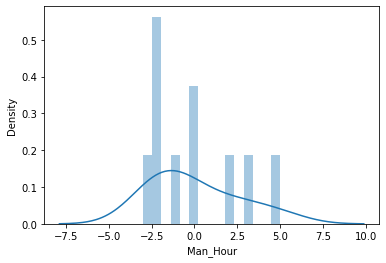

In [47]:
fig = plt.figure()
one
sns.distplot(one, bins = 15) 

plt.show()


# Accessing Model Accuracy


Quantify the extent to which model fits the data or measure of lack of fit using 4 Methods

- Multiple R
- R Statistics
- Adjusted R_square Statistics
- Residual Standard Error  


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)                       # Value of Target variable when we predict it with the Independent variable. 
r2_score(df['Man_Hour'], results) 

0.9956076134699854

In [49]:
mean_squared_error(df['Man_Hour'],results)                        # Know about the error between actual and predicted.  

5.999999999999997

In [57]:
# Standard Error 

In [50]:
# RSE

import math

math.sqrt(mean_squared_error(df['Man_Hour'],results)) 

2.4494897427831774

In [51]:
# R Square 

from sklearn.metrics import r2_score
four = r2_score(df['Man_Hour'],results)  
four

0.9956076134699854

In [52]:
# Multiple R

five = math.sqrt(four) 
five

0.9978013897915684

In [53]:
# Adjusted R Square  

# Adjusted R2 = 1 – [(1 - R2)*(n -1)/(n-k-1)]

Adjusted_R2 = ((1 - four ) * (10 - 1) / (10 - 1 - 1))

1-Adjusted_R2




0.9950585651537336

In [54]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("output.html")


In [55]:
import joblib
joblib.dump(regr, "marketing_model.pkl")    

['marketing_model.pkl']

In [56]:
#  OLS = ordinary least square method. 

import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)                                   
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Man_Hour   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.02e-10
Time:                        11:09:07   Log-Likelihood:                -23.148
No. Observations:                  10   AIC:                             50.30
Df Residuals:                       8   BIC:                             50.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.503      3.995      0.004       4.228      15.772
x1             2.0000      0.047     42.583      0.000       1.892       2.108
==============================================================================
Omnibus:                        1.668   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.067
Skew:                           0.735   Prob(JB):                        0.587
Kurtosis:                       2.367   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""